#How have salaries changed over time between different groups of people?
#Is there any evidence of pay discrimination based on gender in this dataset.


In [1]:
# road map 
# see the dataset 
# understand the variables
# understand differences
# make some hypohesis
# make some visualization
# aggregation funcations
# preprocessing
# modeling 

In [2]:
# get the packages and load the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv("C:\\Users\\amogh\\Downloads\Salaries.csv")

C:\Users\amogh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
data.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [8]:
data.shape

(148654, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [10]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [30]:
data[pd.notnull(data['Status'])]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150,0,342803,38780,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835,10713,60563.5,89540.2,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.7,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450,0,19266.7,91302.5,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068,0,24165.4,91201.7,326233.44,417435.10,2014,NaN,San Francisco,FT
110536,110537,Ellen G Moffatt,Asst Med Examiner,270222,6009.22,67956.2,71580.5,344187.46,415767.94,2014,NaN,San Francisco,FT
110537,110538,John L Martin,Dept Head V,311299,0,0,89772.3,311298.55,401070.87,2014,NaN,San Francisco,FT
110538,110539,Harlan L Kelly-Jr,Executive Contract Employee,310161,0,0,88823.5,310161.02,398984.53,2014,NaN,San Francisco,FT
110539,110540,Samson Lai,"Battalion Chief, Fire Suppress",179464,128686,27334.8,59876.9,335484.96,395361.86,2014,NaN,San Francisco,FT
110540,110541,David L Franklin,Asst Chf of Dept (Fire Dept),201567,97907.4,29916.3,64599.6,329390.54,393990.13,2014,NaN,San Francisco,FT


In [31]:
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [43]:
data[data['TotalPay'] == 567595.430000]
        
        

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [44]:
data[data['TotalPay'] == -618.130000 ]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [48]:
len(data['EmployeeName'].unique())

110811

In [50]:
len(data['JobTitle'].unique())

2159

In [51]:
data['JobTitle'].value_counts()

Transit Operator                                 7036
Special Nurse                                    4389
Registered Nurse                                 3736
Public Svc Aide-Public Works                     2518
Police Officer 3                                 2421
Custodian                                        2418
TRANSIT OPERATOR                                 2388
Firefighter                                      2359
Recreation Leader                                1971
Patient Care Assistant                           1945
Deputy Sheriff                                   1933
Police Officer                                   1476
SPECIAL NURSE                                    1402
Public Service Trainee                           1328
REGISTERED NURSE                                 1219
Police Officer 2                                 1141
Attorney (Civil/Criminal)                        1126
Porter                                           1095
Sergeant 3                  

In [52]:
data[data['JobTitle'] == 'Transit Operator']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
38624,38625,Duane Allen,Transit Operator,69212.9,75242.5,8724.77,44026,153180.17,197206.13,2012,NaN,San Francisco,NaN
39387,39388,Nancy Padilla,Transit Operator,69872.4,69054.8,4906.93,43458.9,143834.08,187293.02,2012,NaN,San Francisco,NaN
39575,39576,Louis Galarce,Transit Operator,69744,65581.7,6391.3,43461.9,141716.92,185178.81,2012,NaN,San Francisco,NaN
39738,39739,Freeman Chee,Transit Operator,70892.6,61682.9,7193.21,43584.3,139768.71,183352.99,2012,NaN,San Francisco,NaN
39904,39905,Robert Dufresne,Transit Operator,71251.2,56238.1,9401.86,44850.6,136891.21,181741.80,2012,NaN,San Francisco,NaN
40002,40003,Carl Anderson,Transit Operator,68611.6,62260.8,6695.09,43106.7,137567.48,180674.19,2012,NaN,San Francisco,NaN
40162,40163,Angel Carvajal,Transit Operator,67225,64797.9,5119.96,41946.8,137142.85,179089.63,2012,NaN,San Francisco,NaN
40455,40456,Jaime Olivar,Transit Operator,68545.7,58914.6,6596.29,42617.2,134056.57,176673.75,2012,NaN,San Francisco,NaN
40825,40826,Oscar Sanchez,Transit Operator,66917.7,58573.5,5639.35,42022.2,131130.53,173152.69,2012,NaN,San Francisco,NaN
40887,40888,Eric Wong,Transit Operator,68726.7,54967.8,6130.1,42909.3,129824.57,172733.86,2012,NaN,San Francisco,NaN


In [54]:
data[data['JobTitle'] == 'Special Nurse']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
39881,39882,Christian Kitchin,Special Nurse,133932,17169.3,22662.6,8255.59,173764.17,182019.76,2012,NaN,San Francisco,NaN
41793,41794,Laurie Towns,Special Nurse,135692,2919.63,17621.2,9928.81,156232.74,166161.55,2012,NaN,San Francisco,NaN
42130,42131,Leah Custis,Special Nurse,127700,10214.7,22198.1,3752.82,160113.12,163865.94,2012,NaN,San Francisco,NaN
42394,42395,Jennifer Chiu,Special Nurse,124074,17112.2,17273.9,3909,158460.13,162369.13,2012,NaN,San Francisco,NaN
42535,42536,Genevieve Hamer,Special Nurse,128164,5377.31,21052.9,6769.96,154593.81,161363.77,2012,NaN,San Francisco,NaN
42680,42681,David Clements,Special Nurse,127605,5729.21,17329.7,9650.62,150664.09,160314.71,2012,NaN,San Francisco,NaN
42699,42700,Leah Teuwen,Special Nurse,124743,7066.72,20586,7802.56,152396.08,160198.64,2012,NaN,San Francisco,NaN
42795,42796,Sapna Patel,Special Nurse,136136,15412.5,4691.45,3358.79,156239.64,159598.43,2012,NaN,San Francisco,NaN
43289,43290,Joseph Malloy,Special Nurse,119106,8977.49,18053.9,10245.6,146137.70,156383.34,2012,NaN,San Francisco,NaN
43736,43737,Winnette Allen,Special Nurse,138707,1404.8,3246.21,9525.88,143357.96,152883.84,2012,NaN,San Francisco,NaN


In [60]:
#data[data['Year'] == 2013]

In [57]:
data.drop(['Notes'],inplace=True,axis=1)

In [58]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency', 'Status'],
      dtype='object')

In [61]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

In [78]:
x = data[pd.isnull(data['BasePay'])]

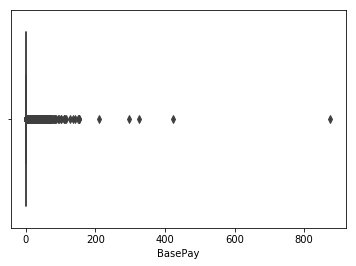

In [77]:
%matplotlib inline
sns.boxplot(data['BasePay'].value_counts())

In [91]:
#plt.figure(figsize=(20,10))
#x['JobTitle'].value_counts().plot(kind='bar')

In [92]:
x['JobTitle'].value_counts()

Transit Operator                  61
Commissioner 16.700c, No Pay      49
Recreation Director               22
Deputy Sheriff                    19
Assistant Recreation Director     14
General Laborer                   12
Parking Control Officer           11
Registered Nurse                  11
Firefighter                       11
Police Officer 3                  10
Custodian                          9
Clerk Typist                       8
Senior Clerk Typist                8
Special Nurse                      7
Police Officer                     7
Senior Eligibility Worker          7
Swimming Instr/Pool Lifeguard      6
Nursing Assistant                  6
Senior Clerk                       5
Patient Care Assistant             5
Customer Service Agent             5
Environmental Service Worker       5
Clerk                              4
Public Svc Aide-Public Works       4
Painter                            4
Counselor, Juvenile Hall           4
Track Maintenance Worker           4
L

In [105]:
y = data['Benefits'].dropna()

In [120]:
y = y.replace('Not Provided',0)

In [123]:
y = y.astype('float')

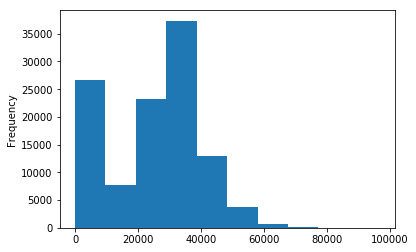

In [124]:
y.plot(kind='hist')

In [126]:
data['Benef
     its']=data['Benefits'].fillna(0)

In [127]:
data['Benefits'] = data['Benefits'].replace('Not Provided',0)

In [148]:
data.isnull().sum()

Series([], dtype: float64)

In [129]:
data.drop(['Status'],inplace=True,axis=1)

In [164]:
data.drop(['EmployeeName' == 'Not provided'],axis=0)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999,71344.9,33149.9,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN


In [167]:
data[data['BasePay']== 'Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
